In [11]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import folium
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
label = LabelEncoder()
data = pd.read_csv("../data/raw/helium-api-data.csv")
data["datarate"] = label.fit_transform(data["datarate"])
data["valid"] = label.fit_transform(data["valid"])

NUM_WITTNESSES = int(data.index[-1]/data["key"].values[-1])
data

,key,ylat,ylon,xlat,xlon,rssi,snr,freq,datarate,valid,distance
0,0,41.748064,-73.659576,41.734572,-73.692091,-80,11.8,904.099976,1,0,3086.783267
1,0,41.748064,-73.659576,41.765272,-73.633632,-83,11.5,904.099976,1,0,2879.681279
2,0,41.748064,-73.659576,41.728785,-73.705810,-91,11.0,904.099976,1,0,4394.474207
3,1,38.229129,21.762428,38.220871,21.794480,-106,1.2,867.900024,0,0,2946.592328
4,1,38.229129,21.762428,38.194222,21.723213,-109,-0.2,867.900024,0,0,5177.357662
5,1,38.229129,21.762428,38.216455,21.751417,-111,3.2,867.900024,0,0,1706.285590
6,2,37.569662,-77.482763,37.573644,-77.487388,-100,1.0,905.099976,1,0,601.854035
7,2,37.569662,-77.482763,37.567321,-77.479346,-104,0.2,905.099976,1,0,398.097330
8,2,37.569662,-77.482763,37.562791,-77.472571,-107,-5.8,905.099976,1,0,1179.360887
9,3,51.912093,8.411511,51.904937,8.414589,-116,-0.8,867.299988,0,0,823.194152


In [5]:
data.describe()

,key,ylat,ylon,xlat,xlon,rssi,snr,freq,datarate,valid,distance
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,60.000000
mean,9.500000,33.068691,-21.787312,33.066734,-21.799787,-105.083333,2.268333,851.098334,0.650000,0.0,4230.006936
std,5.814943,17.350864,76.986573,17.360082,76.987550,11.013538,6.288259,123.602872,0.480995,0.0,3942.191633
min,0.000000,-33.981921,-118.944679,-33.988707,-118.968412,-126.000000,-14.200000,487.299988,0.000000,0.0,0.000000
25%,4.750000,28.031921,-81.910383,28.027942,-81.934019,-112.250000,-1.625000,868.049988,0.000000,0.0,1232.691003
50%,9.500000,37.569662,-38.395810,37.570483,-38.386586,-106.000000,2.000000,904.199982,1.000000,0.0,2961.293506
75%,14.250000,40.349972,22.734490,40.348081,22.732718,-96.750000,7.625000,904.900024,1.000000,0.0,6003.724630
max,19.000000,51.912093,121.143706,52.017949,121.121155,-80.000000,15.200000,924.400024,1.000000,0.0,14545.649002


RSSI ist ziemlich schwach! Zu wenige Daten oder fehler beim Laden? 

SNR: Die Hälfte liegt über 2... Frage: soll schlechte SNR gedroppt werden oder ist das demoduling von LoRaWAN so gut dass es auch mit schlechtem SNR funktioniert

Distanz: liegt zwischen 0m und 14km... frage 14km ist relativ weit für dass das wir nach dem besten Signal gefiltert haben + 0m ist nicht möglich

In [6]:
mean_distance = data.groupby("key")["distance"].sum()/NUM_WITTNESSES
mean_distance.describe()

count      20.000000
mean     4230.006936
std      2626.884230
min       605.878274
25%      2134.954052
50%      3533.958991
75%      6320.067860
max      8702.632347
Name: distance, dtype: float64

Achtung Mean = durchschnitt der durchschnittlichen Distanz

die mindeste durchnittliche Distanz ist 605 die maximale 8702

im schnitt liegen 50% der Witnesses mehr als 3.5 km vom hotspot entfernt

<AxesSubplot: >

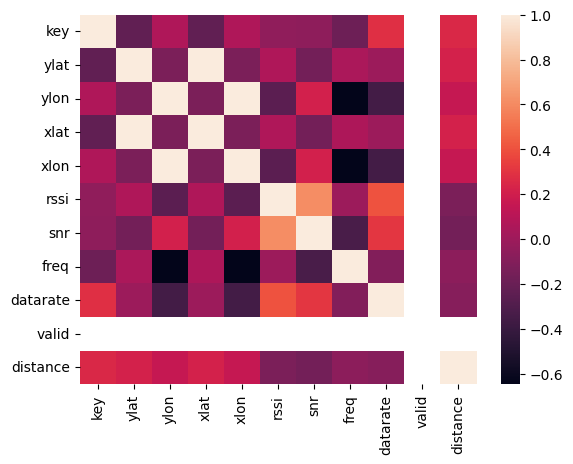

In [7]:
sns.heatmap(data.corr())

Distanz korrelliert nicht mit anderen Features: das ist nicht so gut! zu wenige Daten? 

Andere Features korrellieren nicht miteinander: Das ist gut, dann müssen wir keine Features droppen und haben mehr für das Modell übrig 

Längen und Breiengrade korrenlieren naturgemäß miteinander: Das ist gut! 

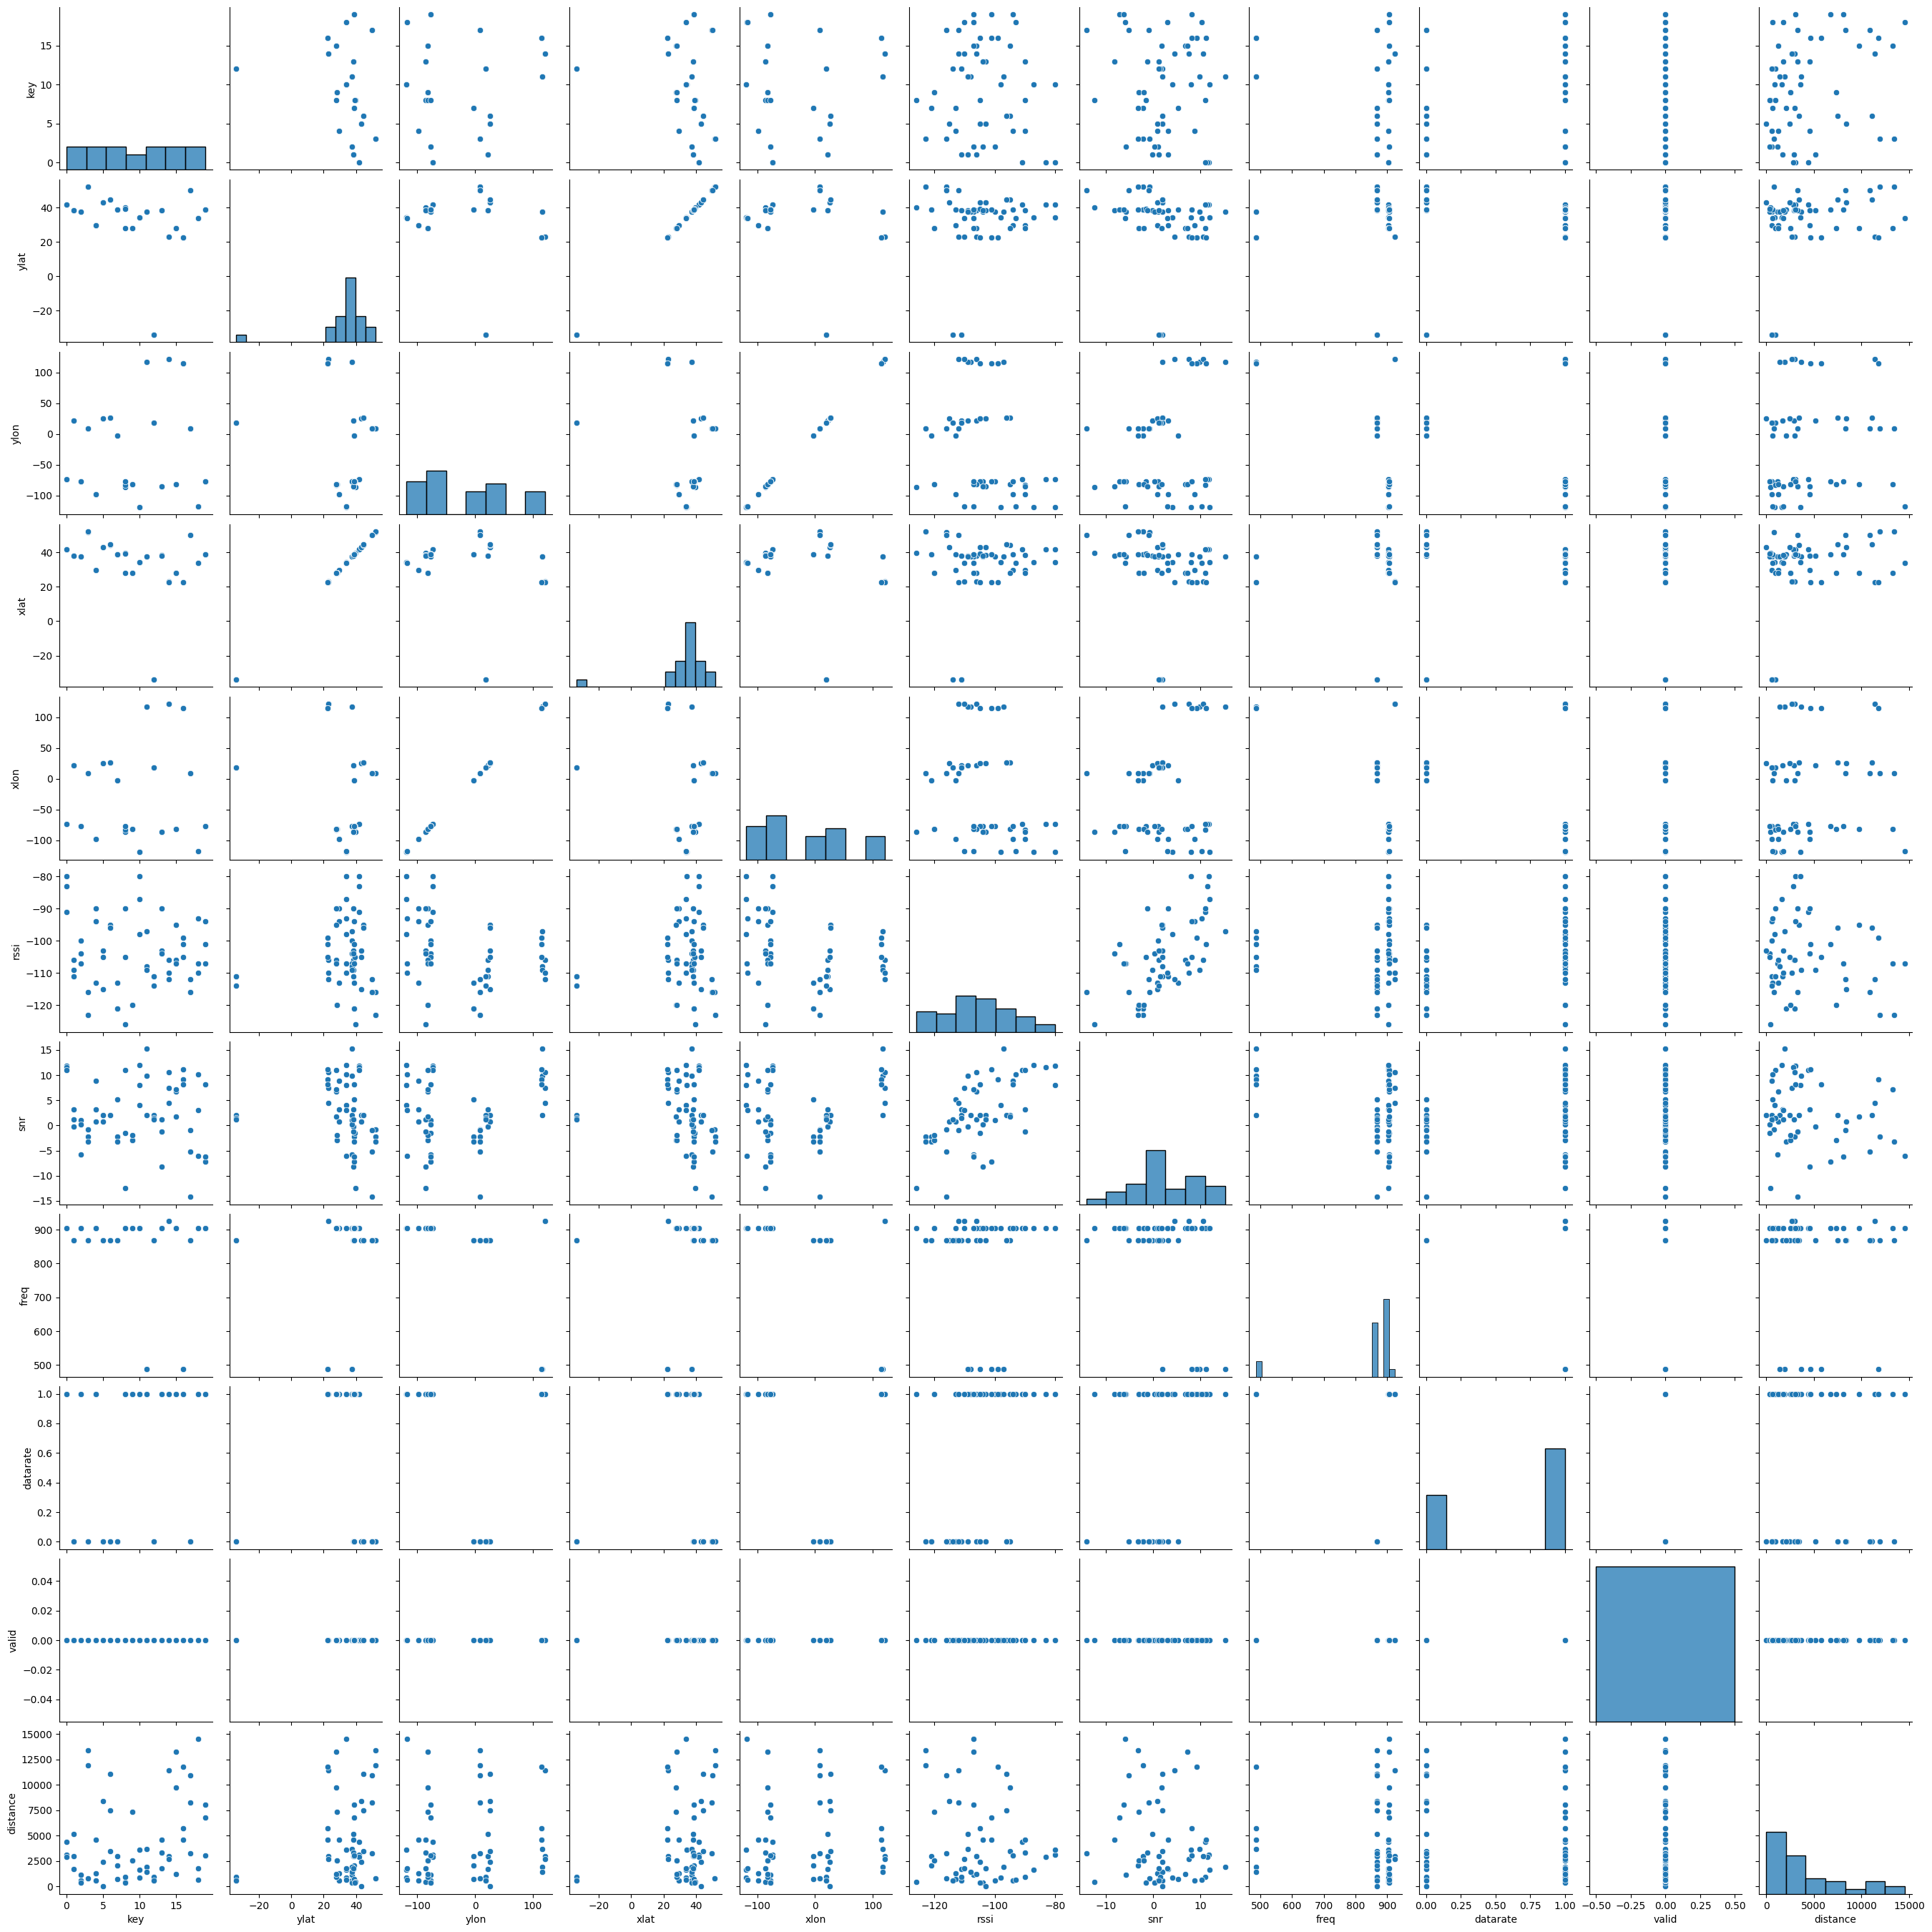

In [8]:
sns.pairplot(data)

Trend zwischen SNR und RSSI erkennbar 

interessant: doch auch größere Distanzen dabei 

In [9]:
data.head()

,key,ylat,ylon,xlat,xlon,rssi,snr,freq,datarate,valid,distance
0,0,41.748064,-73.659576,41.734572,-73.692091,-80,11.8,904.099976,1,0,3086.783267
1,0,41.748064,-73.659576,41.765272,-73.633632,-83,11.5,904.099976,1,0,2879.681279
2,0,41.748064,-73.659576,41.728785,-73.705810,-91,11.0,904.099976,1,0,4394.474207
3,1,38.229129,21.762428,38.220871,21.794480,-106,1.2,867.900024,0,0,2946.592328
4,1,38.229129,21.762428,38.194222,21.723213,-109,-0.2,867.900024,0,0,5177.357662


### Plot Signal SNR and Distance

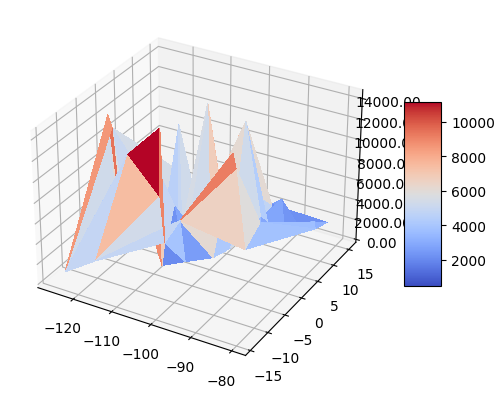

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = data.rssi
Y = data.snr
Z = data.distance
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Geolocations
Visualization of different challenges on a map.

In [157]:
map = folium.Map(
    location=[data["ylat"][0], data["ylon"][0]],
    zoom_start=2
)

locations = data[['xlat', 'xlon']]
locationlist = locations.values.tolist()

for point in range(0, len(locationlist)):
    folium.Marker(
        locationlist[point],
        popup=data['rssi'][point],
        icon=folium.Icon(color="green", icon="circle", prefix="fa")
    ).add_to(map)

for i in range(len(locationlist)):
    folium.Circle(
        radius=data["distance"][i],
        location=locationlist[i],
        color='orange',
        fill=False,
    ).add_to(map)

y_locations = data[['ylat', 'ylon']]
y_locationlist = y_locations.values.tolist()

for point in range(0, len(y_locations[::NUM_WITTNESSES])):
    folium.Marker(
        y_locationlist[point],
        popup="TEST_Y",
        icon=folium.Icon(color="red", icon="bullseye", prefix="fa")
    ).add_to(map)

map

Graphische Triangulation mit Test and allen Datenpunkten: Der Rote Punkt bestätigt oder falsisifiziert das Ergebnis

ACHTUNG: Die Distanzen sind deswegen so genau weil wir mit den berechneten Distanzen aus der Entfernung von Witness zu Hotspot arbeiten... würden wir mit geschätzten Daten aus dem Modell arbeiten würde es nicht so gut übereinstimmen